In [7]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import  pandas_datareader as data

In [8]:
# !conda install pandas-datareader -y

In [10]:
start = '2010-01-01'
end = '2019-12-31'

df = data.DataReader('AAPL','yahoo',start,end)

In [11]:
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-12-31,7.619643,7.520000,7.611786,7.526071,352410800.0,6.415359
2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.515213
2010-01-05,7.699643,7.616071,7.664286,7.656429,601904800.0,6.526476
2010-01-06,7.686786,7.526786,7.656429,7.534643,552160000.0,6.422665
2010-01-07,7.571429,7.466071,7.562500,7.520714,477131200.0,6.410791


In [12]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-12-24,71.222504,70.730003,71.172501,71.067497,48478800.0,69.623230
2019-12-26,72.495003,71.175003,71.205002,72.477501,93121200.0,71.004585
2019-12-27,73.492500,72.029999,72.779999,72.449997,146266000.0,70.977646
2019-12-30,73.172501,71.305000,72.364998,72.879997,144114400.0,71.398895
2019-12-31,73.419998,72.379997,72.482498,73.412498,100805600.0,71.920570


In [13]:
df = df.reset_index()

In [14]:
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2009-12-31,7.619643,7.520000,7.611786,7.526071,352410800.0,6.415359
1,2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.515213
2,2010-01-05,7.699643,7.616071,7.664286,7.656429,601904800.0,6.526476
3,2010-01-06,7.686786,7.526786,7.656429,7.534643,552160000.0,6.422665
4,2010-01-07,7.571429,7.466071,7.562500,7.520714,477131200.0,6.410791


In [15]:
df = df.drop(['Date','Adj Close'],axis=1)
df.head()

,High,Low,Open,Close,Volume
0,7.619643,7.520000,7.611786,7.526071,352410800.0
1,7.660714,7.585000,7.622500,7.643214,493729600.0
2,7.699643,7.616071,7.664286,7.656429,601904800.0
3,7.686786,7.526786,7.656429,7.534643,552160000.0
4,7.571429,7.466071,7.562500,7.520714,477131200.0


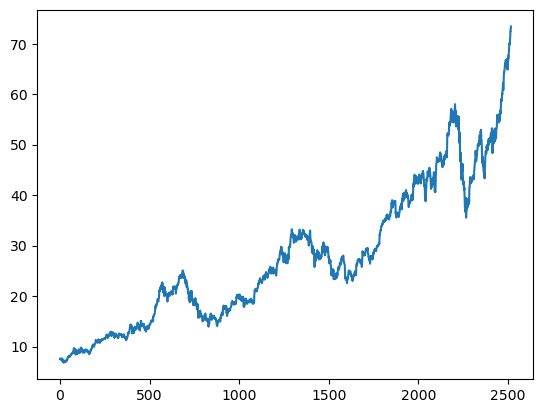

In [16]:
plt.plot(df.Close)

In [17]:
ma100 = df.Close.rolling(100).mean()

In [20]:
ma200 = df.Close.rolling(200).mean()

In [32]:
pd.DataFrame([ma100,ma200]).T.iloc[95:,:]

,Close,Close
95,NaN,NaN
96,NaN,NaN
97,NaN,NaN
98,NaN,NaN
99,8.079250,NaN
...,...,...
2512,59.401700,54.261513
2513,59.643125,54.396763
2514,59.875125,54.529350
2515,60.106325,54.661100


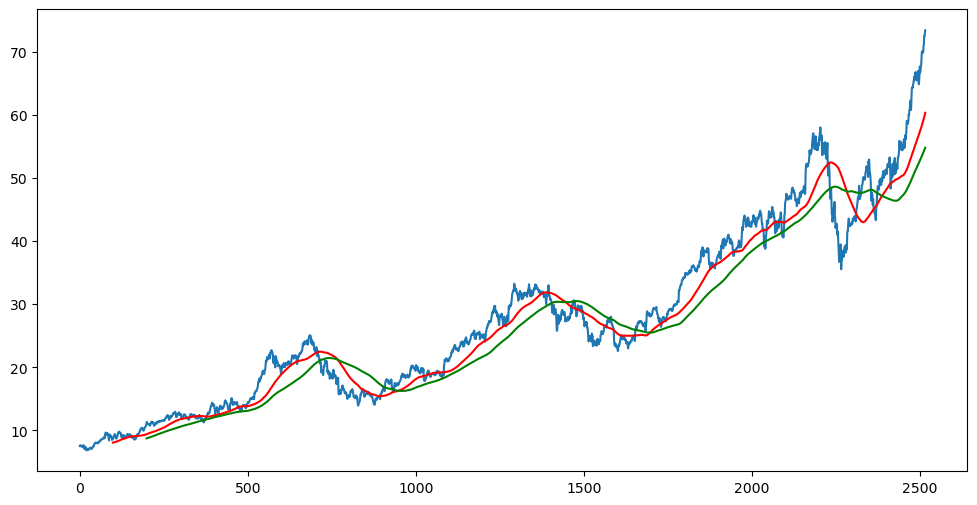

In [35]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')
plt.plot(ma200,'g')

In [36]:
df.shape

(2517, 5)

In [40]:
# Splitting the data into training and testing

data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70):])

print(data_training.shape)
print(data_testing.shape)

(1761, 1)
(756, 1)


In [41]:
data_training.head()

,Close
0,7.526071
1,7.643214
2,7.656429
3,7.534643
4,7.520714


In [42]:
data_testing.head()

,Close
1761,29.182501
1762,28.955000
1763,29.037500
1764,29.004999
1765,29.152500


In [43]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [44]:
data_training_array = scaler.fit_transform(data_training)
data_testing_array = scaler.transform(data_testing)

In [45]:
x_train = []
y_train = []

for i in range(100,data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i,0])

x_train,y_train = np.array(x_train),np.array(y_train)

In [58]:
# Ml model 
from keras.layers import Dense,Dropout,LSTM
from keras.models import Sequential

In [59]:
x_train.shape

(1661, 100, 1)

In [60]:
model = Sequential()
model.add(LSTM(units=50,activation='relu',return_sequences=True,
         input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=60,activation='relu',return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80,activation='relu',return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))

In [61]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 100, 50)           10400     
                                                                 
 dropout_4 (Dropout)         (None, 100, 50)           0         
                                                                 
 lstm_5 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_5 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_6 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_6 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_7 (LSTM)               (None, 120)              

In [62]:
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(x_train,y_train,epochs=50)

Epoch 1/50
52/52 [==============================] - 9s 109ms/step - loss: 0.0760
Epoch 2/50
52/52 [==============================] - 6s 109ms/step - loss: 0.0146
Epoch 3/50
52/52 [==============================] - 6s 108ms/step - loss: 0.0109
Epoch 4/50
52/52 [==============================] - 6s 109ms/step - loss: 0.0092
Epoch 5/50
52/52 [==============================] - 6s 109ms/step - loss: 0.0096
Epoch 6/50
52/52 [==============================] - 6s 114ms/step - loss: 0.0092
Epoch 7/50
52/52 [==============================] - 6s 109ms/step - loss: 0.0078
Epoch 8/50
52/52 [==============================] - 6s 108ms/step - loss: 0.0085
Epoch 9/50
52/52 [==============================] - 6s 109ms/step - loss: 0.0085
Epoch 10/50
52/52 [==============================] - 6s 109ms/step - loss: 0.0075
Epoch 11/50
52/52 [==============================] - 6s 112ms/step - loss: 0.0067
Epoch 12/50
52/52 [==============================] - 6s 109ms/step - loss: 0.0066
Epoch 13/50
52/52 [======

In [63]:
model.save('keras_model.h5')

In [64]:
data_testing.head()

,Close
1761,29.182501
1762,28.955000
1763,29.037500
1764,29.004999
1765,29.152500


In [65]:
past_100_days = data_training.tail(100)

In [67]:
past_100_days.shape

(100, 1)

In [74]:
final_test = past_100_days.append(data_testing,ignore_index=True)

/tmp/ipykernel_7248/416659826.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_test = past_100_days.append(data_testing,ignore_index=True)


In [75]:
final_test.head()

,Close
0,27.092501
1,27.202499
2,27.000000
3,26.982500
4,27.045000


In [76]:
final_test= scaler.transform(final_test)

In [77]:
final_test.shape

(856, 1)

In [79]:
x_test = []
y_test = []

for i in range(100,final_test.shape[0]):
    x_test.append(final_test[i-100:i])
    y_test.append(final_test[i,0])

In [81]:
len(x_test)

756

In [82]:
x_test,y_test = np.array(x_test),np.array(y_test)
print(x_test.shape,y_test.shape)

(756, 100, 1) (756,)


In [83]:
# Making predictions 

y_pred = model.predict(x_test)

24/24 [==============================] - 1s 31ms/step


In [84]:
y_pred.shape

(756, 1)

In [88]:
scaler.scale_

array([0.0378916])

In [89]:
scale_factor = 1/ scaler.scale_
y_pred = y_pred * scale_factor
y_test = y_test * scale_factor

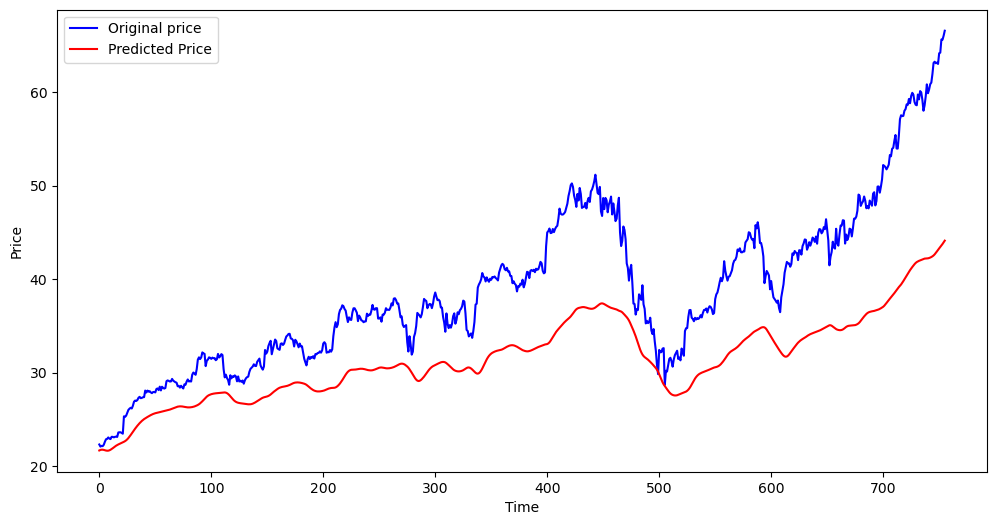

In [91]:
plt.figure(figsize=(12,6))
plt.plot(y_test,'b',label="Original price")
plt.plot(y_pred,'r',label='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()